In [1]:
from flour.data import FlourDataset, FLOAT_COLUMNS
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = FlourDataset("../data/flour_dataset.csv")

# Descriptive Statistics

Number of categories

In [3]:
data.data.groupby("Quality").size()

Quality
Average    878
High        22
Low        576
dtype: int64

In [4]:
data.data.groupby("Quality").size()/data.data.shape[0]*100

Quality
Average    59.485095
High        1.490515
Low        39.024390
dtype: float64

Cross Table between the target and other categorical data

Production Mill:

In [5]:
pd.crosstab(data.data["Quality"], data.data["Production Mill"])

Production Mill,Ancient Oak Mill,Happy Blackberry Windmill,Redwood Orchard Watermill
Quality,,,
Average,0,875,1
High,10,10,2
Low,2,571,1


Note: Need to remove it as the model might overfit on Ancient Oak Mill for high quality flours. 

Production Recipe:

In [6]:
pd.crosstab(data.data["Quality"], data.data["Production Recipe"])

Production Recipe,1.0,2.0,3.0,4.0,5.0
Quality,,,,,
Average,172,156,193,184,172
High,5,9,2,3,3
Low,132,101,102,101,140


Note: it looks OK.

Color:

In [7]:
pd.crosstab(data.data["Quality"], data.data["Color"])

Color,0,1,2,3,4,5,6,7,8,9,10
Quality,,,,,,,,,,,
Average,2,15,434,233,107,39,25,15,5,1,2
High,0,0,19,2,1,0,0,0,0,0,0
Low,0,5,409,120,29,5,6,1,1,0,0


Note: Need to remove it as the model might overfit on Color 2 for high quality flours. 

In [8]:
data.data.describe()

,Package ID,Gluten Content (%),Dough Elasticity Index,Dampening Time (hours),Package Weight (g),Ash content (%),Production Recipe,Moisture (%),Starch Content (%),Package Volume (cm3),Proteins (g)/100g,Color
count,1476.000000,1472.000000,1475.000000,1475.00000,1474.000000,1474.000000,1475.000000,1475.000000,1476.000000,1475.000000,1475.000000,1476.000000
mean,545061.123984,10.454538,43.773042,40.00339,799.998920,1.761594,3.023051,14.348753,56.516125,999.988051,10.499288,2.677507
std,258919.431482,1.411727,135.641860,14.93516,5.060316,0.458863,1.438286,0.299454,2.644198,1.001256,1.049672,1.146400
min,100124.000000,-13.040000,-0.526000,-49.00000,755.841000,1.280000,1.000000,13.780000,41.980000,996.937689,2.300000,0.000000
25%,321936.750000,9.840000,34.120000,33.00000,797.962500,1.700000,2.000000,14.130000,55.197500,999.291733,9.820000,2.000000
50%,539711.000000,10.420000,40.757000,41.00000,800.596500,1.740000,3.000000,14.260000,56.535000,999.972152,10.440000,2.000000
75%,766583.000000,11.080000,46.566500,51.00000,802.883750,1.790000,4.000000,14.480000,57.992500,1000.658132,11.070000,3.000000
max,999490.000000,14.130000,5219.300000,72.00000,821.083000,19.100000,5.000000,15.970000,84.150000,1003.419904,18.000000,10.000000


Impute negative values

In [9]:
data.impute_missing_values(impute_negative_values=True)

In [10]:
data.data.describe()

,Package ID,Gluten Content (%),Dough Elasticity Index,Dampening Time (hours),Package Weight (g),Ash content (%),Production Recipe,Moisture (%),Starch Content (%),Package Volume (cm3),Proteins (g)/100g,Color
count,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000,1475.000000,1476.000000,1476.000000,1476.000000,1476.000000,1476.000000
mean,545061.123984,10.499558,43.803096,41.128205,799.998920,1.761594,3.023051,14.348753,56.516125,999.988051,10.499288,2.677507
std,258919.431482,0.997490,135.590963,12.764179,5.056884,0.458552,1.438286,0.299352,2.644198,1.000917,1.049316,1.146400
min,100124.000000,7.660000,4.742000,0.000000,755.841000,1.280000,1.000000,13.780000,41.980000,996.937689,2.300000,0.000000
25%,321936.750000,9.840000,34.130500,34.000000,797.963500,1.700000,2.000000,14.130000,55.197500,999.293370,9.820000,2.000000
50%,539711.000000,10.420000,40.793500,41.128205,800.593000,1.740000,3.000000,14.260000,56.535000,999.972461,10.440000,2.000000
75%,766583.000000,11.080000,46.565750,51.000000,802.881250,1.790000,4.000000,14.480000,57.992500,1000.657514,11.070000,3.000000
max,999490.000000,14.130000,5219.300000,72.000000,821.083000,19.100000,5.000000,15.970000,84.150000,1003.419904,18.000000,10.000000


## Quantitative variables

In [11]:
def plot_histograms(data, float_columns):
    # Calculate the number of rows for the subplot grid
    num_rows = (len(float_columns) // 3) + (
        len(float_columns) % 3 > 0
    )  # Integer division with remainder check

    # Create a figure for subplots
    fig, axes = plt.subplots(
        nrows=num_rows, ncols=3, figsize=(15, 10)
    )  # Adjust figsize as needed

    # Flatten the 2D axes array for easier iteration
    flat_axes = axes.flatten()

    # Iterate through each numerical column and create a histogram
    for i, col in enumerate(float_columns):
        flat_axes[i].hist(data[col])
        flat_axes[i].set_title(col)
        flat_axes[i].set_xlabel(col)
        flat_axes[i].set_ylabel("Frequency")

    # Handle unused subplots (optional)
    for j in range(len(float_columns), len(flat_axes)):
        flat_axes[j].axis("off")  # Hide unused subplots

    # Adjust layout
    plt.tight_layout()

    # Display the histograms
    plt.show()

Get all numerical columns (quantitative variables)

In [12]:
float_columns = data.data.select_dtypes(include=["float64"]).columns
float_columns = float_columns.drop("Production Recipe")

Visualise distribution of quantitative features

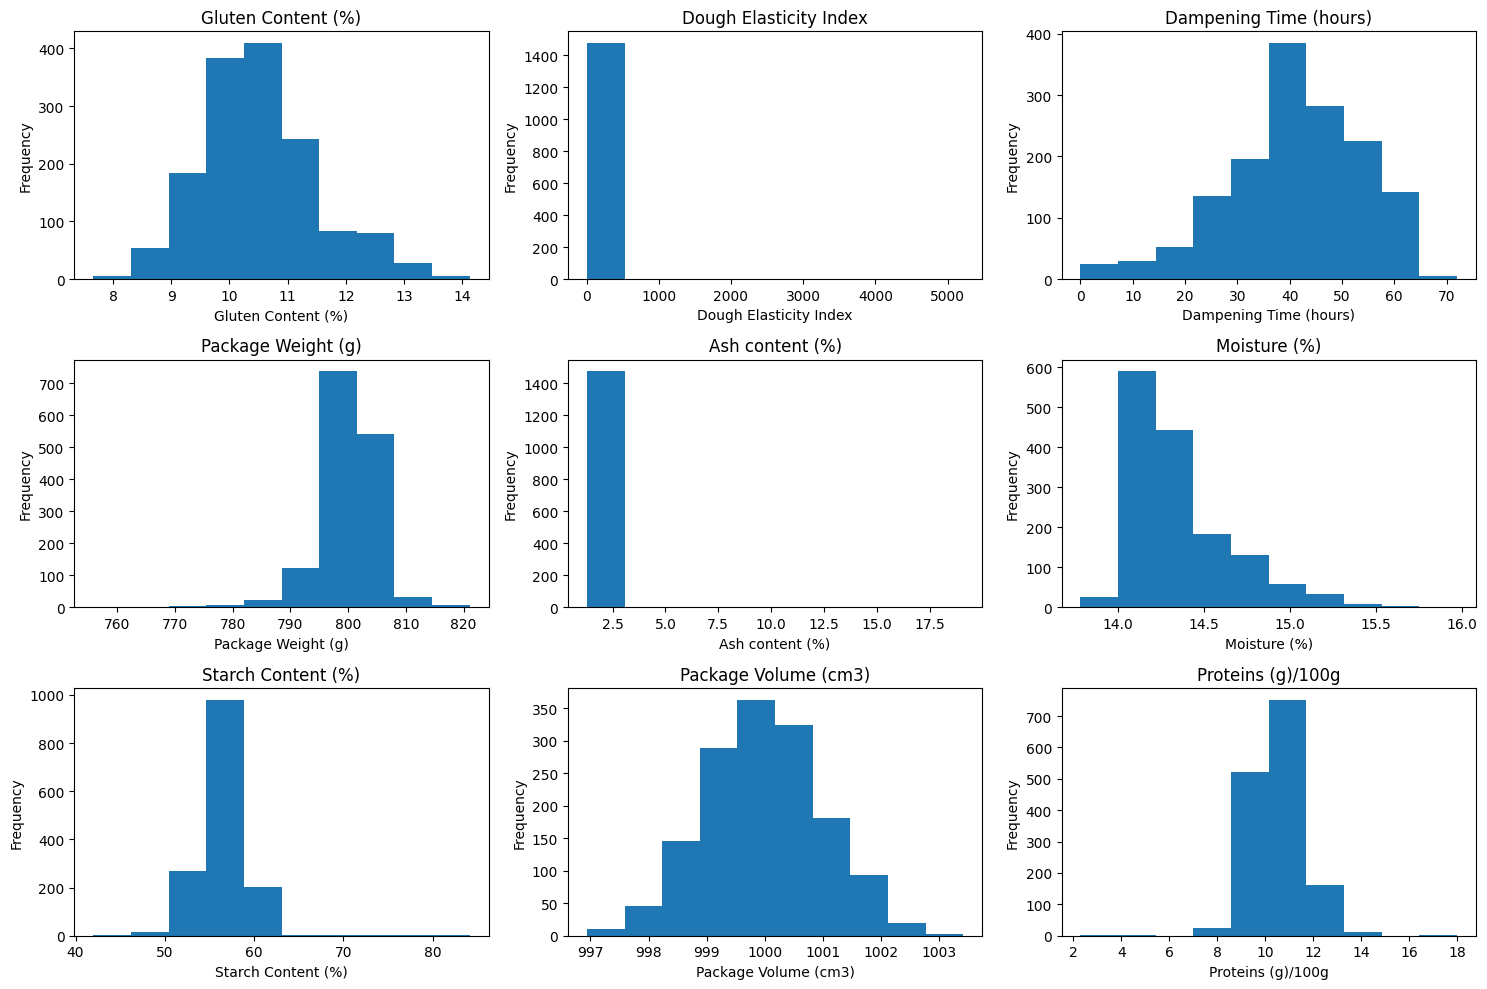

In [13]:
plot_histograms(data.data, float_columns)

## outlier analysis

Dough Elasticity Index

<Axes: title={'center': 'Dough Elasticity Index'}, xlabel='Quality'>

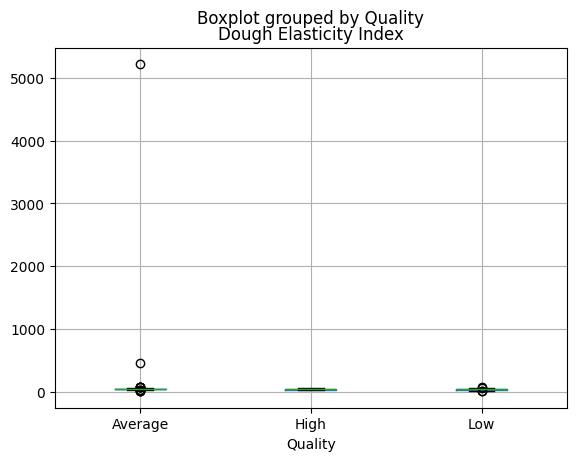

In [14]:
data.data.boxplot(column="Dough Elasticity Index", by="Quality")

Ash content (%)

<Axes: title={'center': 'Ash content (%)'}, xlabel='Quality'>

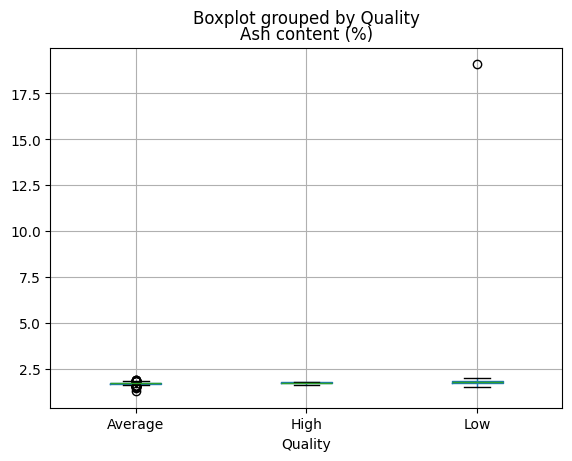

In [15]:
data.data.boxplot(column="Ash content (%)", by="Quality")

Starch Content (%)

<Axes: title={'center': 'Starch Content (%)'}, xlabel='Quality'>

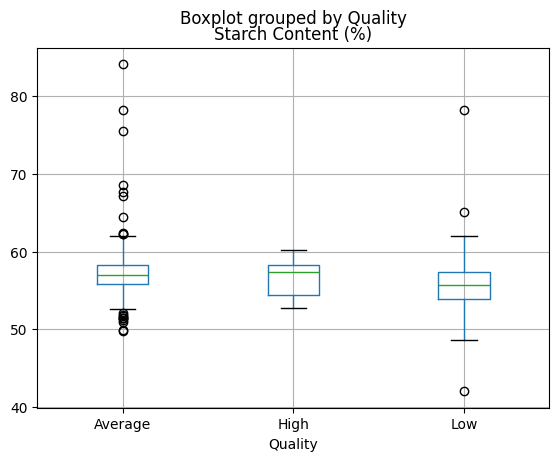

In [16]:
data.data.boxplot(column="Starch Content (%)", by="Quality")

Remove outliers

In [17]:
data.remove_outliers(
    z_threshold=3,
    columns=FLOAT_COLUMNS,
)

['Gluten Content (%)', 'Dough Elasticity Index', 'Dampening Time (hours)', 'Package Weight (g)', 'Ash content (%)', 'Moisture (%)', 'Starch Content (%)', 'Package Volume (cm3)', 'Proteins (g)/100g']


<Axes: title={'center': 'Dough Elasticity Index'}, xlabel='Quality'>

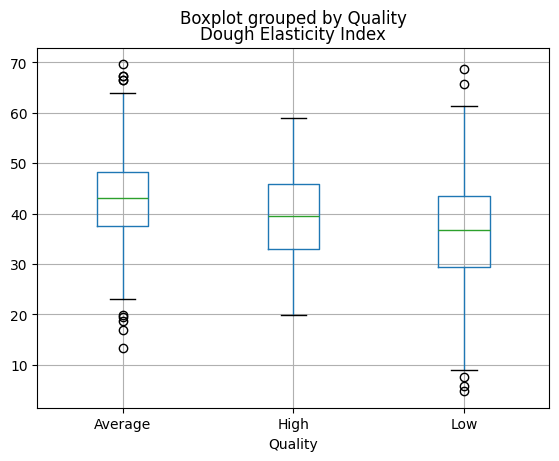

In [18]:
data.data.boxplot(column="Dough Elasticity Index", by="Quality")

<Axes: title={'center': 'Ash content (%)'}, xlabel='Quality'>

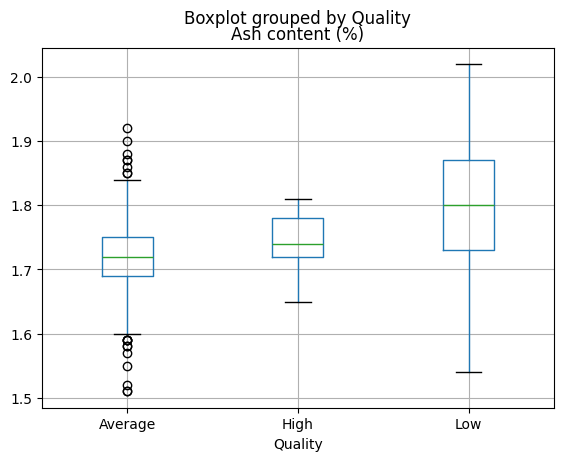

In [19]:
data.data.boxplot(column="Ash content (%)", by="Quality")

<Axes: title={'center': 'Starch Content (%)'}, xlabel='Quality'>

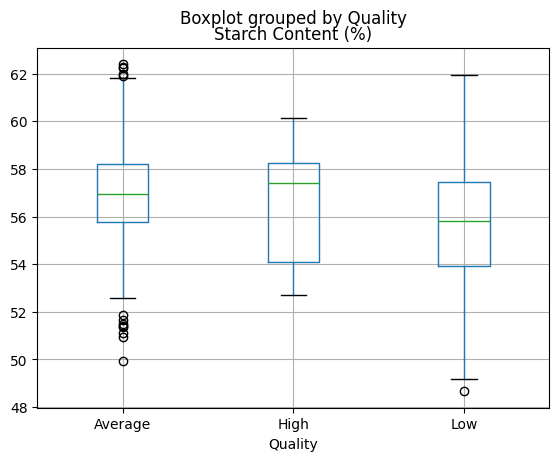

In [20]:
data.data.boxplot(column="Starch Content (%)", by="Quality")

Visualise distribution of quantitative features after outliers removal

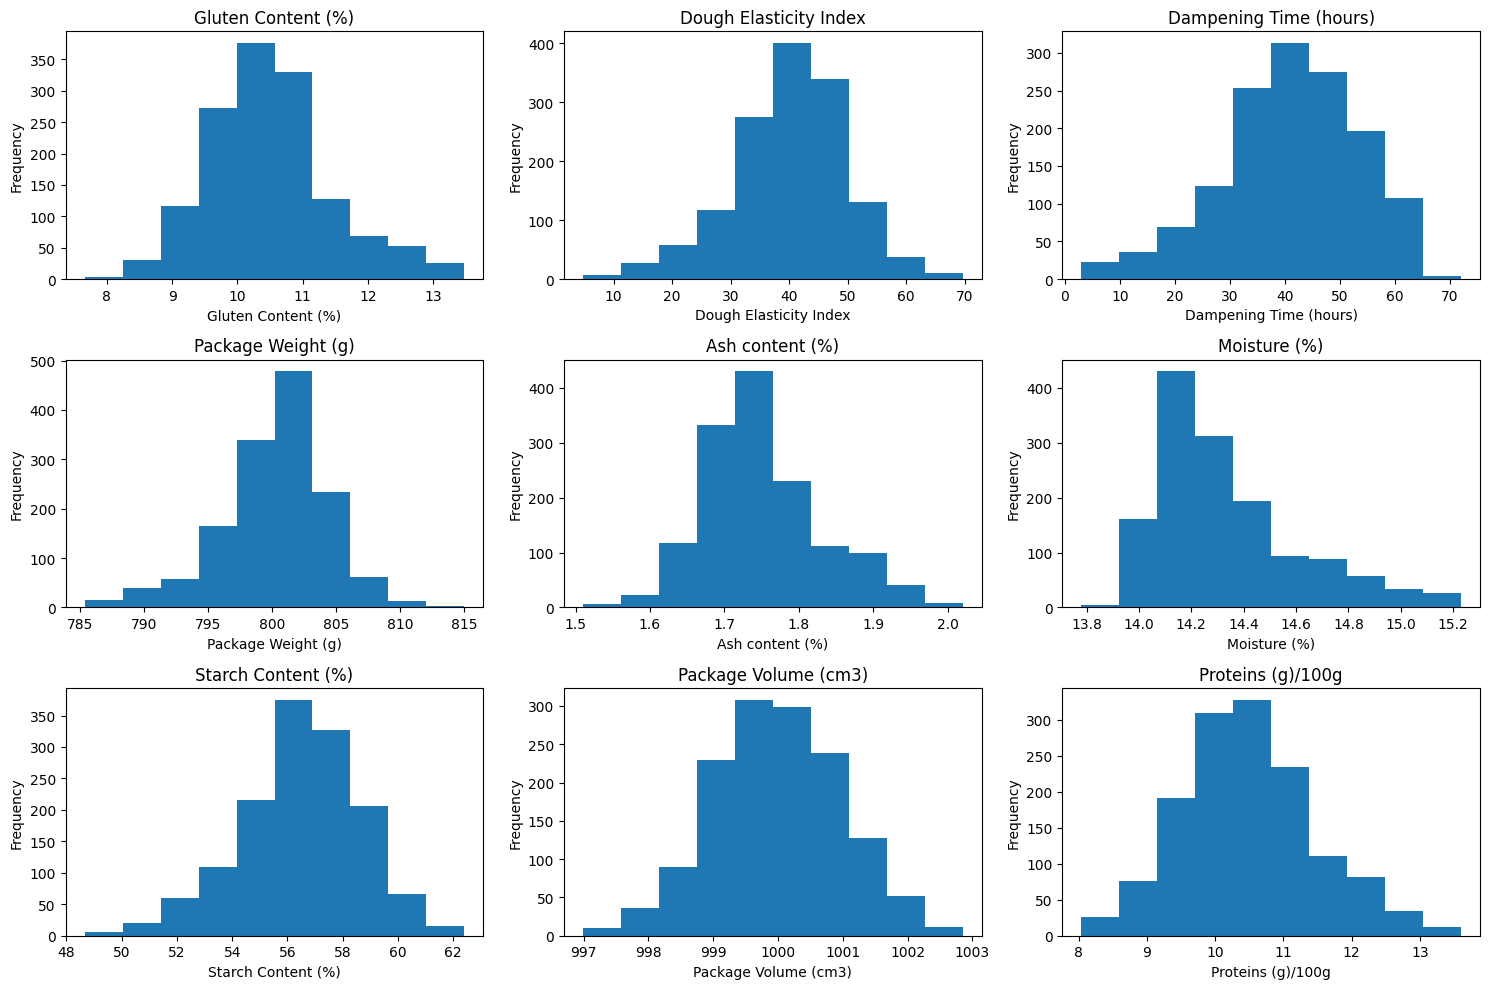

In [21]:
plot_histograms(data.data, float_columns)

# Train/Test statistics

In [22]:
training_dataset = FlourDataset("../data/train.csv")
testing_dataset = FlourDataset("../data/test.csv")

Statistics about train set

In [23]:
training_dataset.data.describe()

,Package ID,Gluten Content (%),Dough Elasticity Index,Dampening Time (hours),Package Weight (g),Ash content (%),Production Recipe,Moisture (%),Starch Content (%),Package Volume (cm3),Proteins (g)/100g,Color
count,1180.000000,1177.000000,1179.000000,1179.000000,1179.000000,1179.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,545472.830508,10.431674,44.854974,39.832909,800.060009,1.765386,3.016949,14.346483,56.564525,999.976841,10.484686,2.696610
std,258923.527177,1.501808,151.622207,14.991907,5.047033,0.511472,1.443203,0.299316,2.603311,0.998717,1.066499,1.160338
min,100124.000000,-13.040000,4.742000,-49.000000,755.841000,1.280000,1.000000,13.780000,41.980000,996.937689,2.300000,0.000000
25%,326129.500000,9.840000,34.317500,33.000000,797.978500,1.700000,2.000000,14.130000,55.280000,999.293370,9.810000,2.000000
50%,535137.000000,10.350000,40.757000,41.000000,800.675000,1.740000,3.000000,14.260000,56.610000,999.954942,10.420000,2.000000
75%,766583.000000,11.010000,46.570500,50.000000,802.860500,1.790000,4.000000,14.465000,58.052500,1000.647279,11.072500,3.000000
max,999490.000000,14.130000,5219.300000,72.000000,821.083000,19.100000,5.000000,15.970000,78.260000,1003.419904,18.000000,10.000000


Statistics about test set

In [24]:
testing_dataset.data.describe()

,Package ID,Gluten Content (%),Dough Elasticity Index,Dampening Time (hours),Package Weight (g),Ash content (%),Production Recipe,Moisture (%),Starch Content (%),Package Volume (cm3),Proteins (g)/100g,Color
count,296.000000,295.000000,296.000000,296.000000,295.000000,295.000000,295.000000,295.000000,296.000000,295.000000,295.000000,296.000000
mean,543419.861486,10.545763,39.463591,40.682432,799.754769,1.746441,3.047458,14.357831,56.323176,1000.032888,10.557695,2.601351
std,259335.046548,0.969277,10.323539,14.712401,5.114395,0.080271,1.420615,0.300342,2.797544,1.011812,0.979022,1.087618
min,100492.000000,8.460000,-0.526000,-30.000000,771.489000,1.470000,1.000000,13.980000,48.660000,997.718014,8.040000,0.000000
25%,311950.750000,9.805000,32.919500,33.000000,797.898000,1.690000,2.000000,14.150000,54.907500,999.300844,9.895000,2.000000
50%,558622.000000,10.500000,40.760500,42.000000,800.445000,1.740000,3.000000,14.260000,56.305000,1000.042030,10.530000,2.000000
75%,766032.500000,11.080000,46.255500,53.000000,802.943500,1.790000,4.000000,14.480000,57.792500,1000.692892,11.065000,3.000000
max,996773.000000,13.480000,66.465000,72.000000,809.645000,2.020000,5.000000,15.660000,84.150000,1003.089816,13.580000,8.000000


In [25]:
training_dataset.data.groupby("Quality").size()

Quality
Average    702
High        18
Low        460
dtype: int64

In [26]:
testing_dataset.data.groupby("Quality").size()

Quality
Average    176
High         4
Low        116
dtype: int64

### Training statistics after preprocessing

With removing and z-score to 2

In [27]:
training_dataset = FlourDataset("../data/preprocessed/flour_z_2.csv")
training_dataset.data.groupby("Quality").size()

Quality
Average    541
High        16
Low        315
dtype: int64

In [28]:
print(f"Total size: {len(training_dataset.data)}")

Total size: 872


With removing and z-score to 3

In [29]:
training_dataset = FlourDataset("../data/preprocessed/flour_z_3.csv")
training_dataset.data.groupby("Quality").size()

Quality
Average    646
High        17
Low        428
dtype: int64

In [30]:
print(f"Total size: {len(training_dataset.data)}")

Total size: 1091


With imputing and z-score to 2

In [31]:
training_dataset = FlourDataset("../data/preprocessed/flour_z_2_impute.csv")
training_dataset.data.groupby("Quality").size()

Quality
Average    567
High        16
Low        320
dtype: int64

In [32]:
print(f"Total size: {len(training_dataset.data)}")

Total size: 903


With imputing and z-score to 3

In [33]:
training_dataset = FlourDataset("../data/preprocessed/flour_z_3_impute.csv")
training_dataset.data.groupby("Quality").size()

Quality
Average    669
High        17
Low        433
dtype: int64

In [34]:
print(f"Total size: {len(training_dataset.data)}")

Total size: 1119
